In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.spatial import ConvexHull
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


# Wat is het probleem?

Op basis van de dataset over verkeersongevallen moet door middel van een AI-model een voorspelling worden gemaakt of een persoon een verkeersongeval heeft overleefd of niet. Uiteindelijk moet het model voorspellen of een persoon overleeft, afhankelijk van factoren zoals leeftijd, geslacht, snelheid van impact, en het gebruik van een helm of gordel.

Onderzoeksvraag: Kan een AI-model voorspellen of een persoon een verkeersongeval overleeft op basis van leeftijd, geslacht, snelheid van impact, en het gebruik van een helm of gordel?

# Data verzamelen

In [2]:
# Load the data
data = pd.read_csv('accident.csv')
display(data.head())

,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
0,56,Female,27.0,No,No,1
1,69,Female,46.0,No,Yes,1
2,46,Male,46.0,Yes,Yes,0
3,32,Male,117.0,No,Yes,0
4,60,Female,40.0,Yes,Yes,0


# Data visualiseren

Age                43.425000
Speed_of_Impact    70.441624
Survived            0.505000
dtype: float64
Empty DataFrame
Columns: [Age, Gender, Speed_of_Impact, Helmet_Used, Seatbelt_Used, Survived]
Index: []
Age                14.941910
Speed_of_Impact    30.125298
Survived            0.501230
dtype: float64


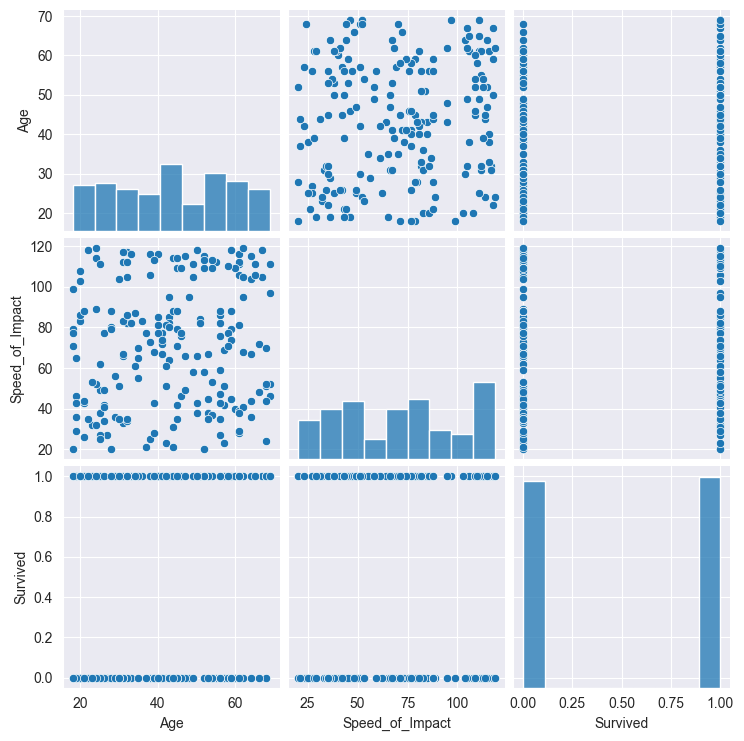

Aantal mensen die hebben overleefd: 101
Aantal mensen die niet hebben overleefd: 99


In [3]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Calculate means, standard deviations, and outliers
means = numeric_data.mean()
stds = numeric_data.std()
outliers = data[(np.abs(numeric_data - means) > 2 * stds).any(axis=1)]

print(means)
print(outliers)
print(stds)


# Visualize the dataset
sns.pairplot(data)
plt.show()


# Aantal overlevenden (Survived == 1) en niet-overlevenden (Survived == 0)
survived_count = data[data['Survived'] == 1].shape[0]
not_survived_count = data[data['Survived'] == 0].shape[0]

# Print de aantallen
print(f"Aantal mensen die hebben overleefd: {survived_count}")
print(f"Aantal mensen die niet hebben overleefd: {not_survived_count}")

 

# Data opschonen en voorbereiden

In [4]:
# Zet 'gender' om naar 0 en 1 (bijv. 0 = vrouw, 1 = man)
data['Gender'] = data['Gender'].map({'Female': 0, 'Male': 1})

# Zet 'helmet used' en 'seatbelt used' om naar 0 en 1 als ze niet al numeriek zijn
data['Helmet_Used'] = data['Helmet_Used'].map({'No': 0, 'Yes': 1})
data['Seatbelt_Used'] = data['Seatbelt_Used'].map({'No': 0, 'Yes': 1})

# Vervang ontbrekende waarden in 'Speed_of_Impact' door 70.441624
data['Speed_of_Impact'].fillna(70.441624, inplace=True)

# Verwijder rijen waar 'Gender' ontbreekt
data.dropna(subset=['Gender'], inplace=True)

# Controleer of alle NaN's weg zijn
print(data.isnull().sum())
print(data.isna().sum()) 



Age                0
Gender             0
Speed_of_Impact    0
Helmet_Used        0
Seatbelt_Used      0
Survived           0
dtype: int64
Age                0
Gender             0
Speed_of_Impact    0
Helmet_Used        0
Seatbelt_Used      0
Survived           0
dtype: int64


C:\Users\Pascal\AppData\Local\Temp\ipykernel_8608\1105801174.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Speed_of_Impact'].fillna(70.441624, inplace=True)


In [5]:
scaler = StandardScaler()

# Selecteer LogisticRegression model

In [6]:
# Definieer features (X) en doelvariabele (y)
X = data[['Age','Gender', 'Speed_of_Impact', 'Helmet_Used', 'Seatbelt_Used']]
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train en test het model

In [7]:
# Model aanmaken en trainen
model = LogisticRegression()
model.fit(X_train, y_train)

train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

# Voorspellingen maken
y_pred = model.predict(X_test)

pred_counts = pd.Series(y_pred).value_counts()




# Analyseer en evalueer

C:\Users\Pascal\AppData\Local\Temp\ipykernel_8608\4035131489.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pred_counts.index, y=pred_counts.values, palette="Blues")


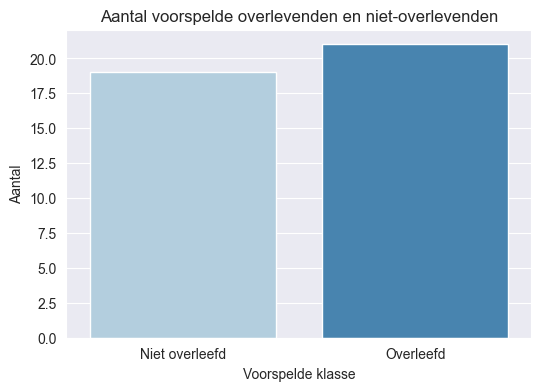

Aantal voorspelde overlevenden: 21
Aantal voorspelde niet-overlevenden: 19
Decision Tree Train Score: 0.58
Decision Tree Test Score: 0.42
Decision Tree Modelnauwkeurigheid: 0.42


In [8]:
# Staafdiagram
plt.figure(figsize=(6, 4))
sns.barplot(x=pred_counts.index, y=pred_counts.values, palette="Blues")

# Labels en titel
plt.xlabel("Voorspelde klasse")
plt.ylabel("Aantal")
plt.title("Aantal voorspelde overlevenden en niet-overlevenden")
plt.xticks(ticks=[0, 1], labels=["Niet overleefd", "Overleefd"])

# Toon de grafiek
plt.show()

# Aantal voorspelde overlevenden (Survived == 1) en niet-overlevenden (Survived == 0) volgens het model
predicted_survived_count = (y_pred == 1).sum()
predicted_not_survived_count = (y_pred == 0).sum()

# Print de aantallen voorspelde overlevenden en niet-overlevenden
print(f"Aantal voorspelde overlevenden: {predicted_survived_count}")
print(f"Aantal voorspelde niet-overlevenden: {predicted_not_survived_count}")

accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Train Score: {train_score:.2f}")
print(f"Decision Tree Test Score: {test_score:.2f}")
print(f"Decision Tree Modelnauwkeurigheid: {accuracy:.2f}")



# Selecteer DecisionTreeClassifier model

In [9]:
# Definieer features (X) en doelvariabele (y)
X = data[['Age','Gender', 'Speed_of_Impact', 'Helmet_Used', 'Seatbelt_Used']]
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [10]:
# Maak het DecisionTreeClassifier model
dt_model = DecisionTreeClassifier(random_state=42)

# Train het model
dt_model.fit(X_train, y_train)

# Train score en test score
train_score = dt_model.score(X_train, y_train)
test_score = dt_model.score(X_test, y_test)

# Voorspellingen maken
y_pred = dt_model.predict(X_test)


C:\Users\Pascal\AppData\Local\Temp\ipykernel_8608\1923987768.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pred_counts.index, y=pred_counts.values, palette="Blues")


Random Forest Train Score: 1.00
Random Forest Test Score: 0.70
Random Forest Modelnauwkeurigheid: 0.70


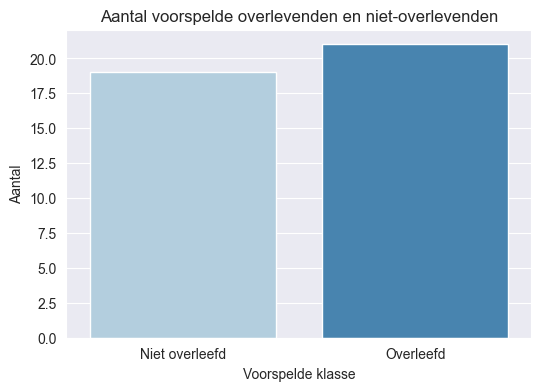

In [11]:
plt.figure(figsize=(6, 4))
sns.barplot(x=pred_counts.index, y=pred_counts.values, palette="Blues")

# Labels en titel
plt.xlabel("Voorspelde klasse")
plt.ylabel("Aantal")
plt.title("Aantal voorspelde overlevenden en niet-overlevenden")
plt.xticks(ticks=[0, 1], labels=["Niet overleefd", "Overleefd"])



accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Train Score: {train_score:.2f}")
print(f"Random Forest Test Score: {test_score:.2f}")
print(f"Random Forest Modelnauwkeurigheid: {accuracy:.2f}")

# Selecteer RandomForestClassifier model

In [12]:

X = data[['Age', 'Gender', 'Speed_of_Impact', 'Helmet_Used', 'Seatbelt_Used']]
y = data['Survived']

# Split de data in trainings- en testset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [13]:
# Maak het RandomForestClassifier model
rf_model = RandomForestClassifier(random_state=42)

# Train het model
rf_model.fit(X_train, y_train)

train_score = rf_model.score(X_train, y_train)
test_score = rf_model.score(X_test, y_test)

# Voorspellingen maken
y_pred = rf_model.predict(X_test)

C:\Users\Pascal\AppData\Local\Temp\ipykernel_8608\1923987768.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pred_counts.index, y=pred_counts.values, palette="Blues")


Random Forest Train Score: 1.00
Random Forest Test Score: 0.50
Random Forest Modelnauwkeurigheid: 0.50


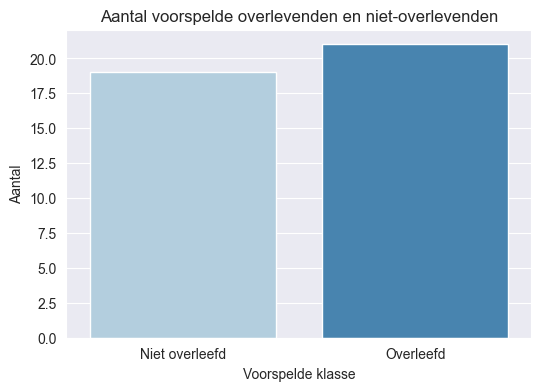

In [14]:
plt.figure(figsize=(6, 4))
sns.barplot(x=pred_counts.index, y=pred_counts.values, palette="Blues")

# Labels en titel
plt.xlabel("Voorspelde klasse")
plt.ylabel("Aantal")
plt.title("Aantal voorspelde overlevenden en niet-overlevenden")
plt.xticks(ticks=[0, 1], labels=["Niet overleefd", "Overleefd"])



accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Train Score: {train_score:.2f}")
print(f"Random Forest Test Score: {test_score:.2f}")
print(f"Random Forest Modelnauwkeurigheid: {accuracy:.2f}")

# Vergelijking van de modellen

| Model         | Train Score            | Test Score             |
|---------------|------------------------|------------------------|
| LogisticRegression       | 1.00     | 0.70     |
| DecisionTreeClassifier        | 1.00     | 0.70      |
| RandomForestClassifier | 1.00     | 0.70     |

# Conclusie